Connected to coderestcdd (Python 3.12.6)

In [ ]:
import pandas as pd

Connected to titanic (Python 3.12.5)

In [ ]:
import pandas as pd

In [ ]:
from collections import Counter

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import re

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
deb2 = pd.read_excel("p2_deb.xlsx")

<ipython-input-10-e73fb3601a44>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deb2_filtrado['freq_esc'] = pd.Categorical(deb2_filtrado['freq_esc'], categories=ordem_freq, ordered=True)
<ipython-input-10-e73fb3601a44>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_lesionou = deb2_filtrado.groupby(['freq_esc', 'ja_lesionou']).size().unstack(fill_value=0)
<ipython-input-10-e73fb3601a44>:32: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 3
  plt.legend(handles=handles, labels=labels, title='Já se lesionou', loc='

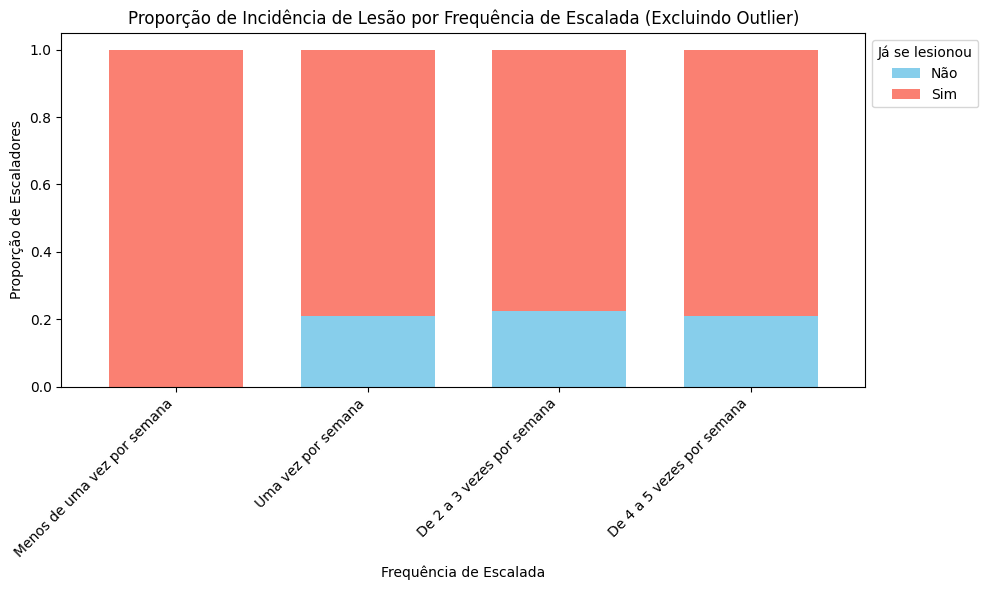

In [ ]:
# Definir a ordem desejada para as categorias de frequência de escalada, sem o outlier
ordem_freq = [
    "Menos de uma vez por semana",
    "Uma vez por semana",
    "De 2 a 3 vezes por semana",
    "De 4 a 5 vezes por semana"
]

# Filtrar os dados para remover o outlier "Mais de 5 vezes na semana"
deb2_filtrado = deb2[deb2['freq_esc'].isin(ordem_freq)]

# Garantir que a coluna freq_esc siga a ordem definida no conjunto filtrado
deb2_filtrado['freq_esc'] = pd.Categorical(deb2_filtrado['freq_esc'], categories=ordem_freq, ordered=True)

# Calcular a proporção de lesão dentro de cada grupo de frequência de escalada
freq_lesionou = deb2_filtrado.groupby(['freq_esc', 'ja_lesionou']).size().unstack(fill_value=0)
freq_lesionou = freq_lesionou.loc[freq_lesionou.sum(axis=1) > 0]  # Remover categorias sem valores
freq_lesionou = freq_lesionou.div(freq_lesionou.sum(axis=1), axis=0)  # Converter para proporções

# Plotar o gráfico de barras empilhado com proporções
ax = freq_lesionou.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6), width=0.7)

# Personalizar o gráfico
plt.title('Proporção de Incidência de Lesão por Frequência de Escalada (Excluindo Outlier)')
plt.ylabel('Proporção de Escaladores')
plt.xlabel('Frequência de Escalada')
plt.xticks(rotation=45, ha='right')

# Adicionar uma nota na legenda sobre o valor atípico
handles, labels = ax.get_legend_handles_labels()
labels = ['Não', 'Sim', 'Outlier: Mais de 5 vezes na semana']
plt.legend(handles=handles, labels=labels, title='Já se lesionou', loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar o layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()

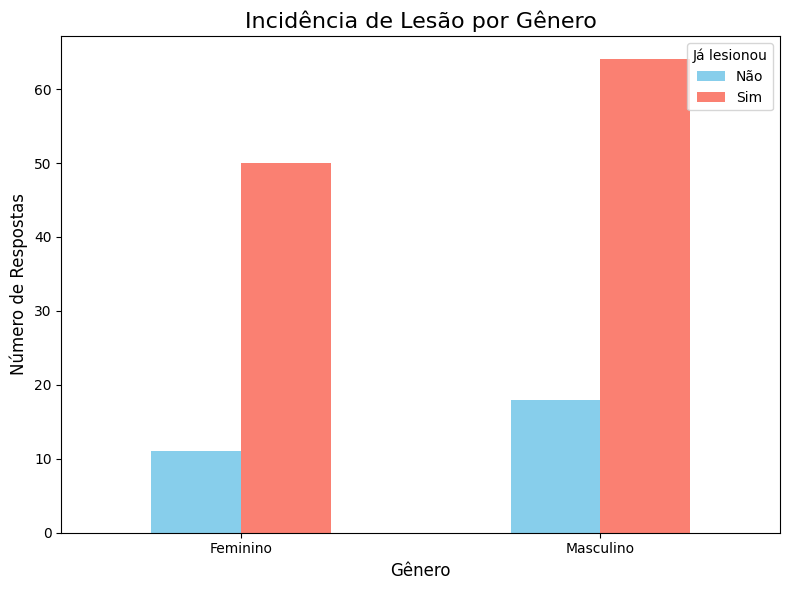

In [ ]:
data = deb2.groupby(['genero', 'ja_lesionou']).size().unstack()

# Criando o gráfico de barras
data.plot(kind='bar', figsize=(8, 6), stacked=False, color=['skyblue', 'salmon'])

# Adicionando título e legendas
plt.title('Incidência de Lesão por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Já lesionou', loc='upper right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

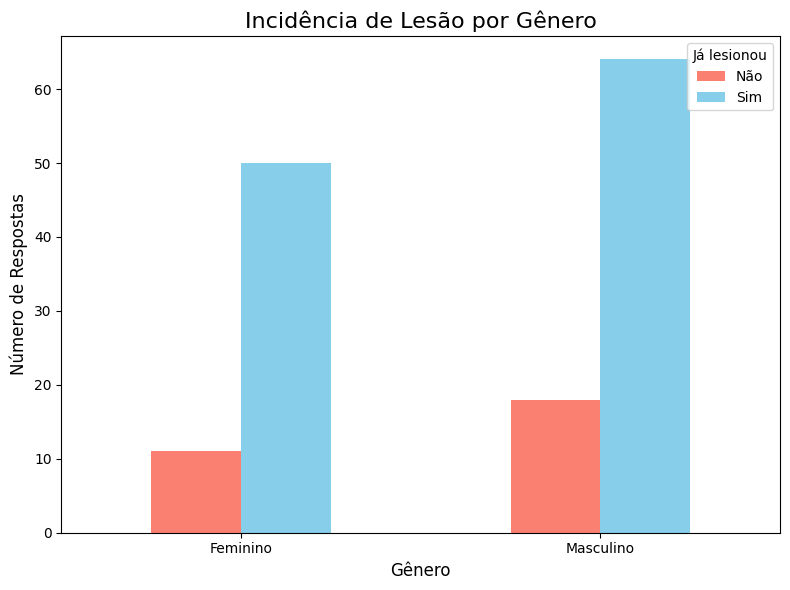

In [ ]:
# Exemplo de agrupamento dos dados
data = deb2.groupby(['genero', 'ja_lesionou']).size().unstack()

# Criando o gráfico de barras
data.plot(kind='bar', figsize=(8, 6), stacked=False, color=['salmon', 'skyblue'])

# Adicionando título e legendas
plt.title('Incidência de Lesão por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Já lesionou', loc='upper right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

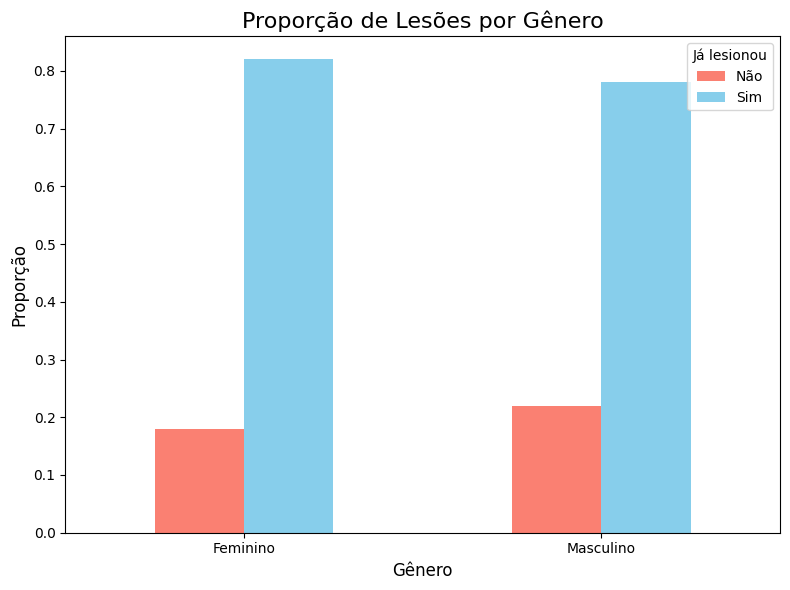

In [ ]:
# Calculando a proporção para cada gênero
proportional_data = deb2.groupby(['genero', 'ja_lesionou']).size().unstack()
proportional_data = proportional_data.div(proportional_data.sum(axis=1), axis=0)

# Criando o gráfico de barras com proporções
proportional_data.plot(kind='bar', figsize=(8, 6), stacked=False, color=['salmon', 'skyblue'])

# Adicionando título e legendas
plt.title('Proporção de Lesões por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Já lesionou', loc='upper right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

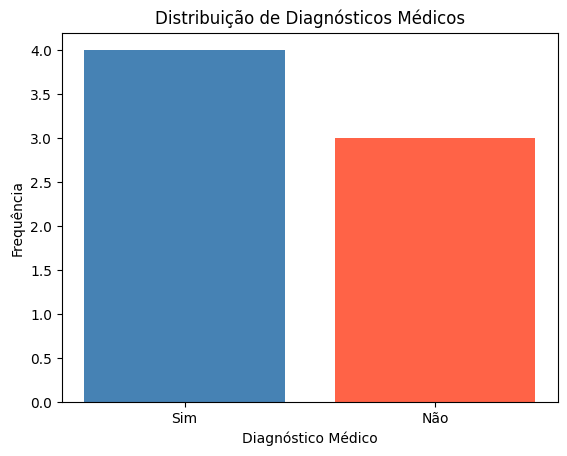

In [ ]:
data = {'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']}
deb2 = pd.DataFrame(data)

# Contar valores únicos na coluna
diagnostico_counts = deb2['diagnostico_medico'].value_counts()

# Criar o gráfico de barras
plt.bar(diagnostico_counts.index, diagnostico_counts.values, color=['steelblue', 'tomato'])

# Adicionar rótulos e título
plt.title("Distribuição de Diagnósticos Médicos")
plt.xlabel("Diagnóstico Médico")
plt.ylabel("Frequência")

# Mostrar o gráfico
plt.show()

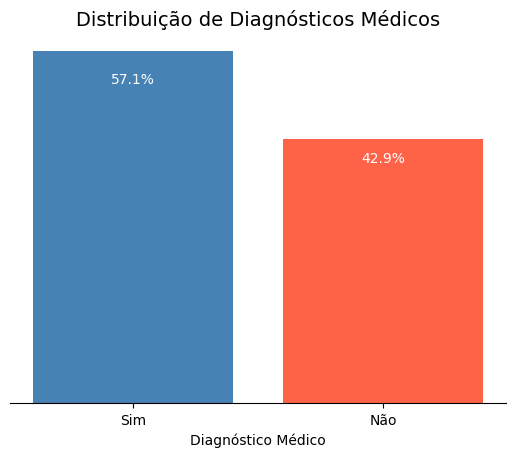

In [ ]:
# Contar valores únicos na coluna
diagnostico_counts = deb2['diagnostico_medico'].value_counts()
total = diagnostico_counts.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(diagnostico_counts.index, diagnostico_counts.values, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar in bars:
    height = bar.get_height()
    percentage = f'{(height / total) * 100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height - (height * 0.1), percentage,
            ha='center', va='bottom', color='white', fontsize=10)

# Configurar o gráfico
ax.set_title("Distribuição de Diagnósticos Médicos", fontsize=14)
ax.set_xlabel("Diagnóstico Médico")
ax.set_ylabel("Frequência")
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

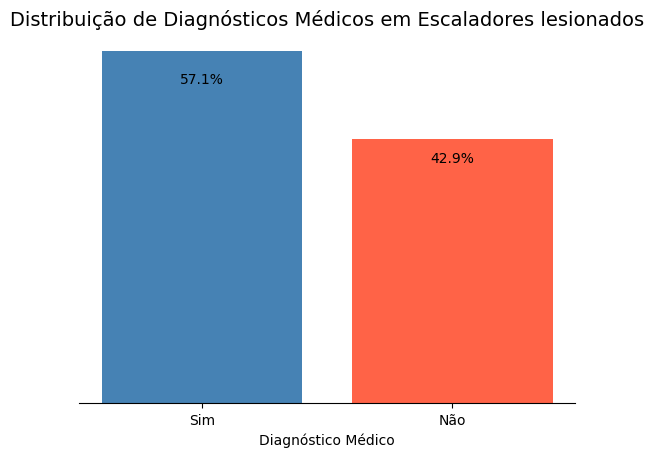

In [ ]:
# Contar valores únicos na coluna
diagnostico_counts = deb2['diagnostico_medico'].value_counts()
total = diagnostico_counts.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(diagnostico_counts.index, diagnostico_counts.values, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar in bars:
    height = bar.get_height()
    percentage = f'{(height / total) * 100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height - (height * 0.1), percentage,
            ha='center', va='bottom', color='black', fontsize=10)

# Configurar o gráfico
ax.set_title("Distribuição de Diagnósticos Médicos em Escaladores lesionados", fontsize=14)
ax.set_xlabel("Diagnóstico Médico")
ax.set_ylabel("Frequência")
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

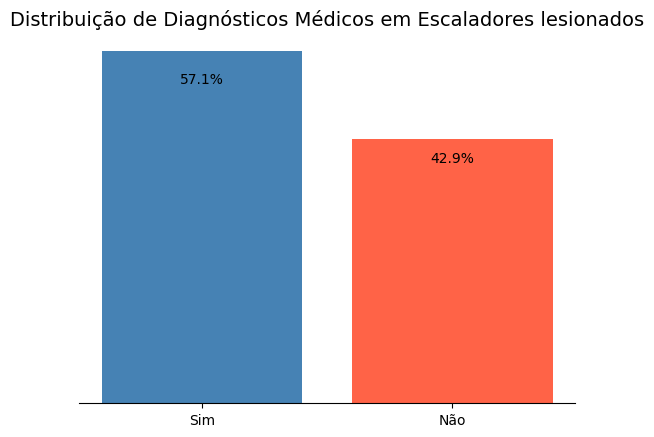

In [ ]:
# Contar valores únicos na coluna
diagnostico_counts = deb2['diagnostico_medico'].value_counts()
total = diagnostico_counts.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(diagnostico_counts.index, diagnostico_counts.values, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar in bars:
    height = bar.get_height()
    percentage = f'{(height / total) * 100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height - (height * 0.1), percentage,
            ha='center', va='bottom', color='black', fontsize=10)

# Configurar o gráfico
ax.set_title("Distribuição de Diagnósticos Médicos em Escaladores lesionados", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Frequência")
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

In [ ]:
# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='upper right')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

KeyError: 'genero'

In [ ]:
# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = deb2.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='upper right')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

AttributeError: 'DataFrame' object has no attribute 'crosstab'

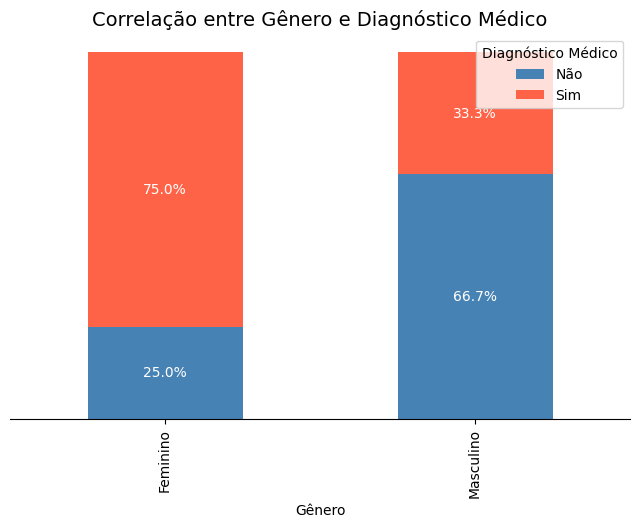

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='upper right')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

ValueError: 'middle' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

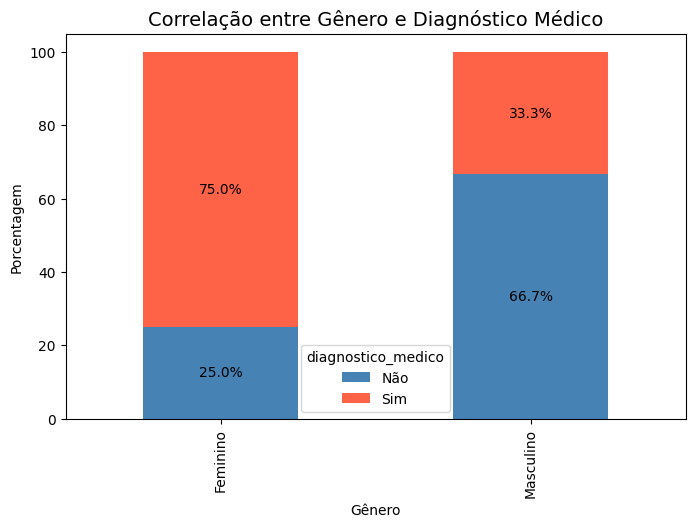

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='middle')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

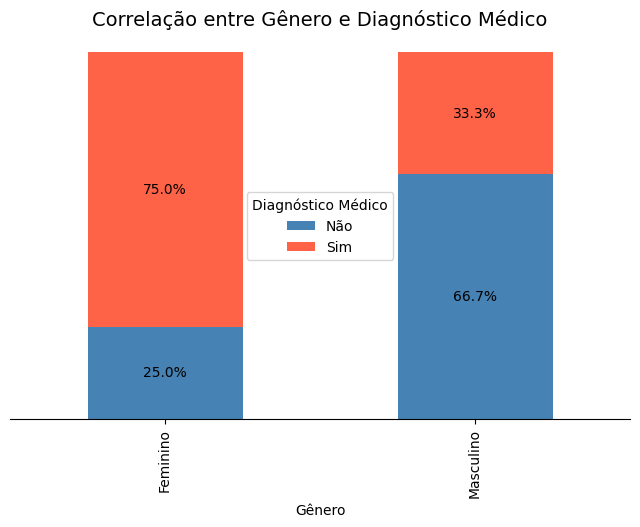

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='center')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

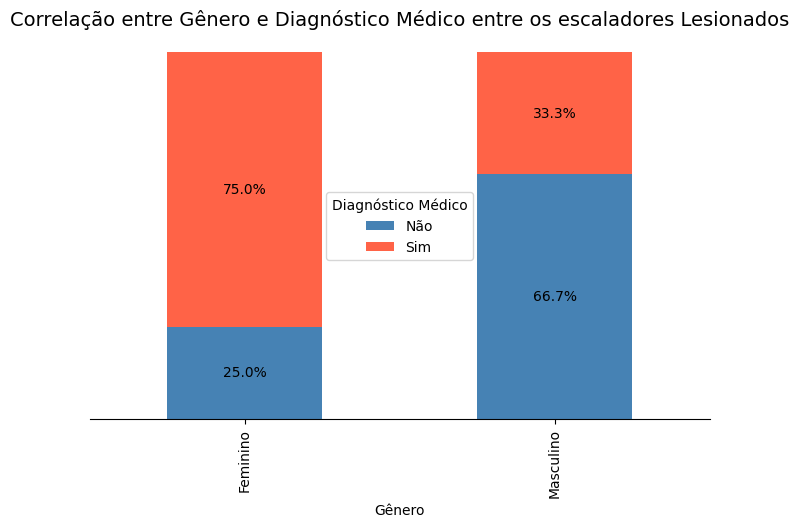

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'tomato'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico entre os escaladores Lesionados", fontsize=14)
ax.set_xlabel("Gênero")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='center')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Mostrar o gráfico
plt.show()

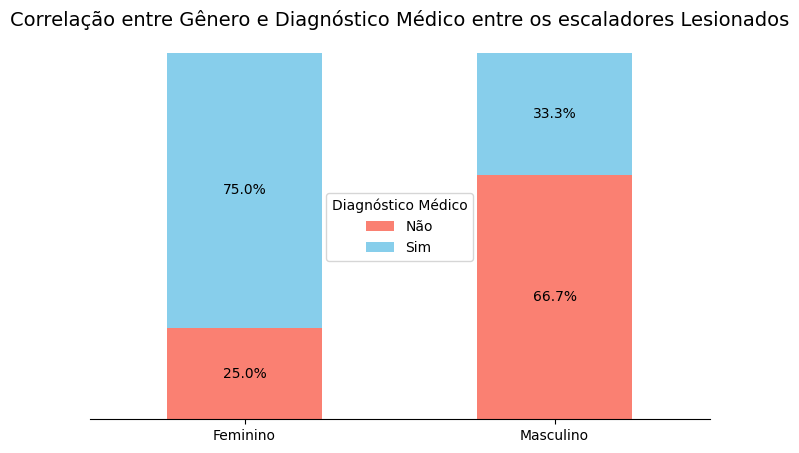

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'skyblue'])

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico entre os escaladores Lesionados", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='center')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Ajustar rótulos do eixo X para horizontal
ax.set_xticklabels(cross_tab.index, rotation=0)

# Mostrar o gráfico
plt.show()

In [ ]:
# Calculando a proporção para cada gênero
proportional_data = deb2.groupby(['genero', 'ja_lesionou']).size().unstack()
proportional_data = proportional_data.div(proportional_data.sum(axis=1), axis=0)

# Criando o gráfico de barras com proporções
proportional_data.plot(kind='bar', figsize=(8, 6), stacked=False, color=['salmon', 'skyblue'])

# Adicionando título e legendas
plt.title('Proporção de Lesões por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Já lesionou', loc='upper right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# 8 Correlação entre Gênero e Diagnóstico Médico entre os escaladores Lesionados

# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'skyblue'], edgecolor='black')

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico entre os escaladores Lesionados", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='center')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Ajustar rótulos do eixo X para horizontal
ax.set_xticklabels(cross_tab.index, rotation=0)

# Mostrar o gráfico
plt.show()

KeyError: 'ja_lesionou'

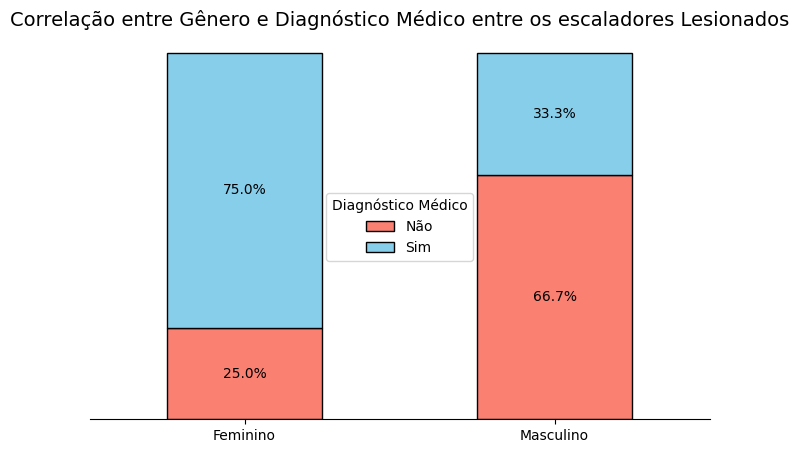

In [ ]:
# Exemplo de dados
data = {
    'genero': ['Feminino', 'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino', 'Feminino'],
    'diagnostico_medico': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}
deb2 = pd.DataFrame(data)

# Criar tabela de frequência cruzada entre gênero e diagnóstico
cross_tab = pd.crosstab(deb2['genero'], deb2['diagnostico_medico'], normalize='index') * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 5))

bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'skyblue'], edgecolor='black')

# Adicionar porcentagens dentro das barras
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Mostrar apenas se houver valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

# Configurar o gráfico
ax.set_title("Correlação entre Gênero e Diagnóstico Médico entre os escaladores Lesionados", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Porcentagem")
ax.legend(title="Diagnóstico Médico", loc='center')
ax.spines['top'].set_visible(False)  # Remover linha superior
ax.spines['right'].set_visible(False)  # Remover linha lateral direita
ax.spines['left'].set_visible(False)  # Remover linha lateral esquerda
ax.get_yaxis().set_visible(False)  # Esconder escala vertical

# Ajustar rótulos do eixo X para horizontal
ax.set_xticklabels(cross_tab.index, rotation=0)

# Mostrar o gráfico
plt.show()